Logistic Regression:
Accuracy: 0.91
Precision: 0.9148936170212766
Recall: 0.8958333333333334
F1 Score: 0.9052631578947369
ROC AUC Score: 0.9351963141025641
Confusion Matrix: [[96  8]
 [10 86]]

Decision Tree:
Accuracy: 0.72
Precision: 0.717391304347826
Recall: 0.6875
F1 Score: 0.702127659574468
ROC AUC Score: 0.71875
Confusion Matrix: [[78 26]
 [30 66]]

Random Forest:
Accuracy: 0.88
Precision: 0.9285714285714286
Recall: 0.8125
F1 Score: 0.8666666666666666
ROC AUC Score: 0.9580328525641025
Confusion Matrix: [[98  6]
 [18 78]]

Support Vector Machine:
Accuracy: 0.85
Precision: 0.8586956521739131
Recall: 0.8229166666666666
F1 Score: 0.8404255319148937
ROC AUC Score: 0.9174679487179488
Confusion Matrix: [[91 13]
 [17 79]]



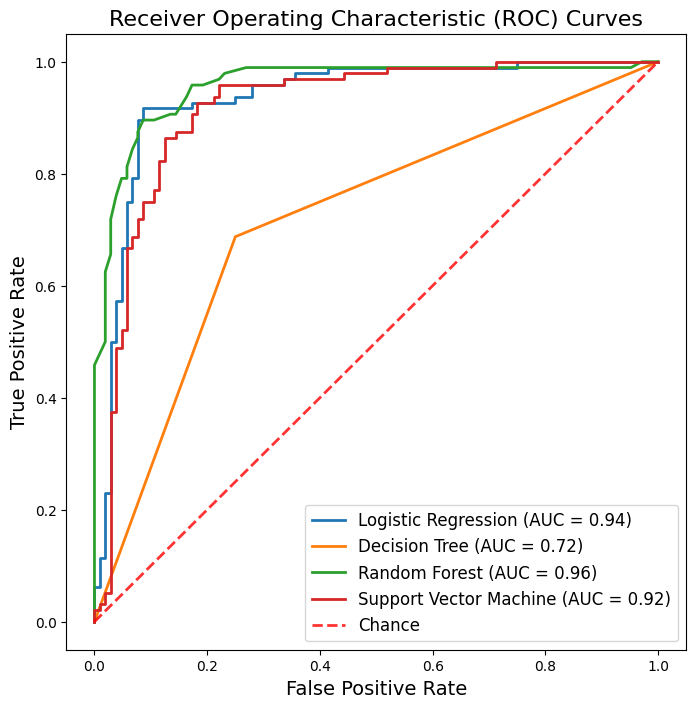

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('image_features.csv')
X = data.loc[:, 'Feature0':'Feature16381'].values
y = data['Label'].tolist()

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to compute the metrics
def compute_metrics(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='positive')
    recall = recall_score(y_test, y_pred, pos_label='positive')
    f1 = f1_score(y_test, y_pred, pos_label='positive')
    cm = confusion_matrix(y_test, y_pred)
    if hasattr(clf, "predict_proba"):
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, clf.decision_function(X_test))
    return acc, prec, recall, f1, cm, roc_auc


# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    acc, prec, recall, f1, cm, auc_score = compute_metrics(clf, X_test, y_test)
    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': recall, 'F1 Score': f1, 'ROC AUC Score': auc_score, 'Confusion Matrix': cm}
    # Save the model
    dump(clf, name.lower().replace(' ', '_') + '.joblib')

# Print the results
for name, result in results.items():
    print(name + ':')
    for metric, value in result.items():
        print(metric + ':', value)
    print()

# Plot the ROC curves
plt.figure(figsize=(8, 8))
for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label='positive')
    else:
        fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test), pos_label='positive')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=name + ' (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()
